In [16]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = np.reshape(x_train, (-1,28,28,1)).astype("float32") /255.0
x_test = np.reshape(x_test, (-1,28,28,1)).astype("float32") /255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)

(60000, 28, 28, 1)


In [23]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


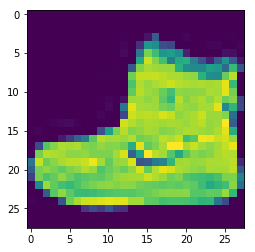

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
(x1_train, y1_train), (x1_test, y1_test) = fashion_mnist.load_data()
index=0
plt.imshow(x1_train[index])
plt.title("Label: {}".format(train1_labels[index]))

In [ ]:
from keras import models,layers

In [12]:
'''
(28,28,1) grayscale
(28,28,3) rgb

conv2d goes a little but down in space but up in semantics (n-2, n-2, 32) 
n-2 because it is a sliding window so its a border effect

flatten is latent space. it is the mathematical representation of the semantics of your data

max takes the max of the 2 by 2 window. no overlap. that is why this is downsampling

dense does the classification
'''

model = models.Sequential()
model.add(layers.Conv2D(32,
                       (3,3),
                       activation="relu", 
                       input_shape=(28,28,1)
))

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,
                       (3,3),
                       activation="relu"
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,
                       (3,3),
                       activation="relu"
))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [13]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [33]:
history = model.fit(
    x_train,y_train,
    epochs=9,
    batch_size=64
)

Epoch 1/9
60000/60000 [==============================] - 24s 402us/step - loss: 0.1508 - acc: 0.9451
Epoch 2/9
60000/60000 [==============================] - 24s 397us/step - loss: 0.1438 - acc: 0.9471
Epoch 3/9
60000/60000 [==============================] - 25s 418us/step - loss: 0.1347 - acc: 0.9507
Epoch 4/9
60000/60000 [==============================] - 27s 447us/step - loss: 0.1294 - acc: 0.9537
Epoch 5/9
60000/60000 [==============================] - 25s 416us/step - loss: 0.1225 - acc: 0.9544
Epoch 6/9
60000/60000 [==============================] - 25s 411us/step - loss: 0.1215 - acc: 0.9558
Epoch 7/9
60000/60000 [==============================] - 25s 409us/step - loss: 0.1140 - acc: 0.9584
Epoch 8/9
60000/60000 [==============================] - 25s 412us/step - loss: 0.1124 - acc: 0.9600
Epoch 9/9
60000/60000 [==============================] - 25s 410us/step - loss: 0.1080 - acc: 0.9620


In [18]:
loss,acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 139us/step


In [28]:
print(loss,acc)

0.26981394889354704 0.9019


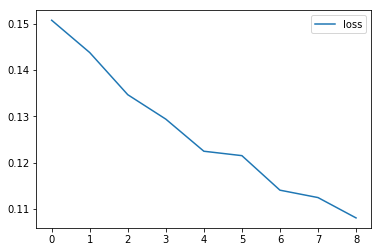

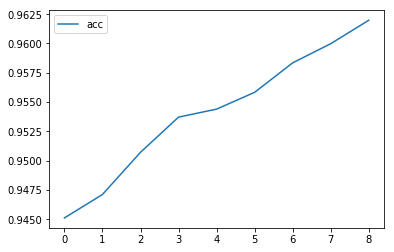

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.legend()
plt.show()
plt.close()

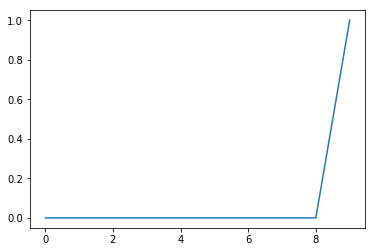

In [45]:
prediction = model.predict(x_test[0:1])[0]
plt.plot(prediction)

In [35]:
labels=["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

Text(0.5, 1.0, 'Label: Ankle boot')

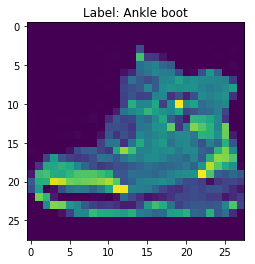

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
(x1_train, y1_train), (x1_test, y1_test) = fashion_mnist.load_data()
index=122
plt.imshow(x1_test[index])
plt.title("Label: {}".format(labels[y1_test[index]]))